## Demonstrating the Central Limit Theorem on the $\chi^2(1)$ distribution

The $\chi^2(1)$ distribution is chosen because it is particularly skewed, and thus not normal. Thus, normal behavior of samples of $n$ $\chi^2(1)$s as $n$ gets large would demonstrate the central limit theorem.

In [3]:
from __future__ import print_function
import numpy as np
import pylab as pl
import scipy.stats as sps
%pylab inline

Populating the interactive namespace from numpy and matplotlib


For each sample size, generate 500 samples of samples.

In [10]:
np.random.seed(4111976)
sizelist = np.array([1, 5, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600,
                      700, 800, 900, 1000, 1200, 1400, 1600, 1800, 2000])
data = [[] for i in range(len(sizelist))]
for i in range(len(sizelist)):
    # For each size, create 500 samples of chi^2(1) of that size
    for j in range(500):
        data[i].append(np.random.chisquare(1, sizelist[i]))
# Calculate the sample means of each of the 500 samples for each size
# The 500 sample means are the data for the demo to calculate the moments of each sample size
sampmeans = [[np.mean(data[i][j]) for j in range(500)] for i in range(len(sizelist))]
means = [np.mean(sampmeans[i]) for i in range(len(sizelist))]
variances = [np.var(sampmeans[i]) for i in range(len(sizelist))]
skews = [sps.skew(sampmeans[i]) for i in range(len(sizelist))]

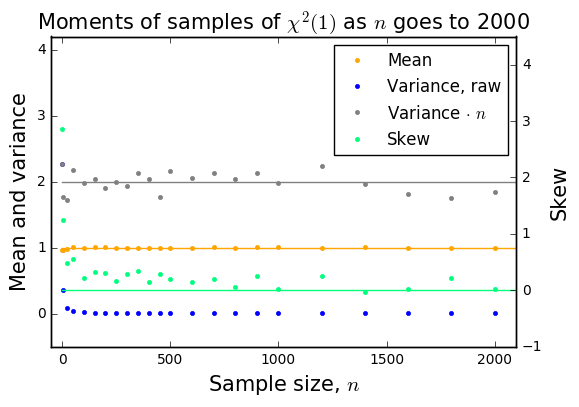

In [46]:
fig = pl.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.plot([0, 2100], [1, 1], "-", color="orange")
ax.plot([0, 2100], [2, 2], "-", color="grey")
s_ax = ax.twinx()
s_ax.plot([0, 2100], [0, 0], "-", color="springgreen")
ax.plot(sizelist, means, ".", color="orange", label="Mean")
ax.plot(sizelist, variances, ".", color="blue", label="Variance, raw")
ax.plot(sizelist, variances * sizelist, ".", color="grey", label="Variance $\cdot$ $n$")
ax.plot([], [], ".", color="springgreen", label="Skew") # Puts no data on the plot,
#                                                         but does add to the legend
ax.set_ybound(-.5, 4.2)
ax.set_xbound(-50, 2100)
s_ax.plot(sizelist, skews, ".", color="springgreen", label="Skew")
s_ax.set_ybound(-1, 4.5)
s_ax.set_xbound(-50, 2100)
ax.set_xlabel("Sample size, $n$", fontsize=15)
ax.set_ylabel("Mean and variance", fontsize=15)
s_ax.set_ylabel("Skew", fontsize=15)
pl.title("Moments of samples of $\chi^2(1)$ as $n$ goes to 2000", fontsize=15)
ax.legend(loc=1, numpoints=1)

Figure 1. In individual samples, the $\chi^2(1)$ distribution is highly skewed to less than the mean. However, following the Central Limit Theorem, as the sample size increases, the skew tends to 0, or the skew of the normal distribution. Further, in accordance with the Central Limit Theorem, the mean of the sample means hovers around the 1, the mean of the $\chi^2(1)$ distribution, and the variance times the sample size hover around 2, the variance of the $\chi^2(1)$ distribution.